In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/Input/train_tweet.csv')
test = pd.read_csv('/content/drive/MyDrive/Datasets/Input/test_tweets.csv')

In [4]:
print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [6]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [10]:
train.isnull().any()

id       False
label    False
tweet    False
dtype: bool

In [11]:
test.isnull().any()

id       False
tweet    False
dtype: bool

In [14]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [15]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


<Axes: >

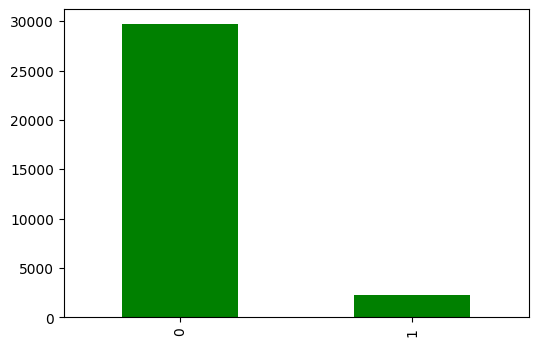

In [19]:
train['label'].value_counts().plot.bar(color = 'green', figsize=(6,4))

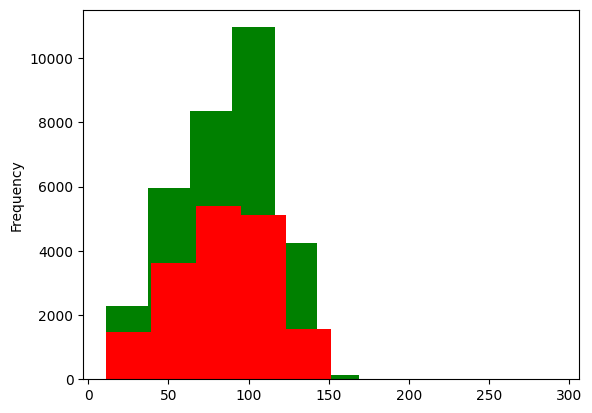

In [6]:
len_train = train['tweet'].str.len().plot.hist(color = 'green')
len_test = test['tweet'].str.len().plot.hist(color = 'red')

In [7]:
# adding a new column for length of tweets
train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

In [8]:
train.head()

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [9]:
test.head()

,id,tweet,len
0,31963,#studiolife #aislife #requires #passion #dedic...,90
1,31964,@user #white #supremacists want everyone to s...,101
2,31965,safe ways to heal your #acne!! #altwaystohe...,71
3,31966,is the hp and the cursed child book up for res...,142
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",93


In [13]:
train.groupby('label')['len'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,29720.0,84.328634,29.566484,11.0,62.0,88.0,107.0,274.0
1,2242.0,90.187779,27.375502,12.0,69.0,96.0,111.0,152.0


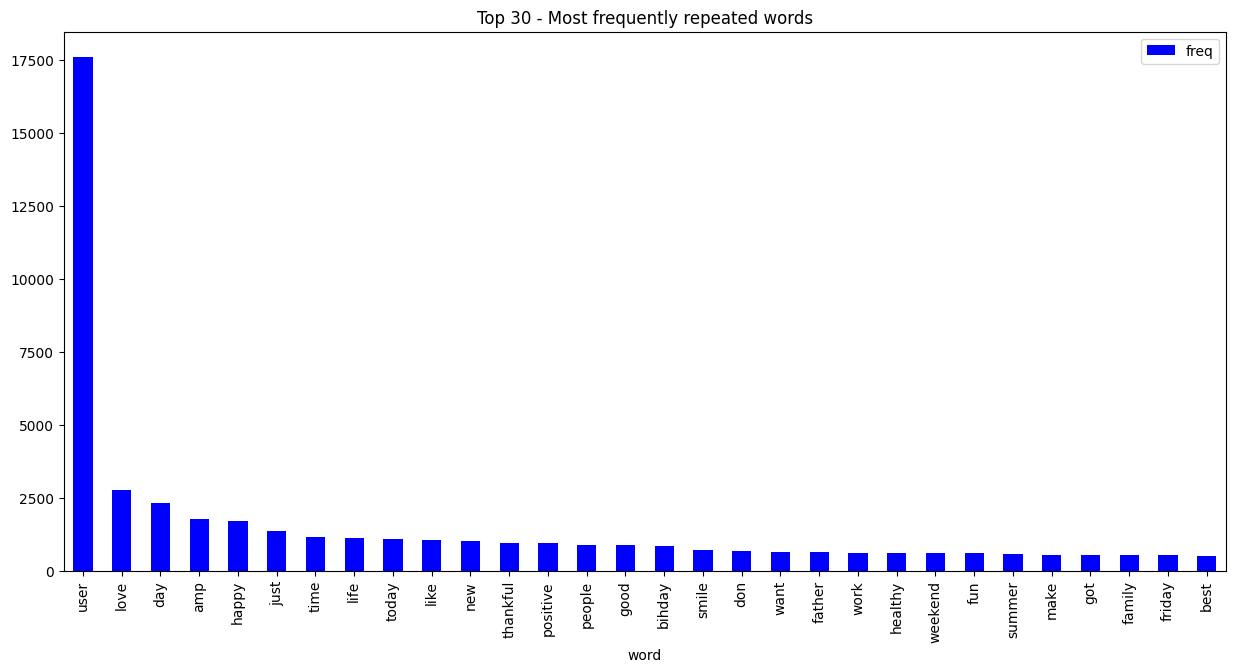

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

word_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x:x[1], reverse=True)

frequency = pd.DataFrame(word_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15,7),color='blue')
plt.title('Top 30 - Most frequently repeated words')
plt.show()

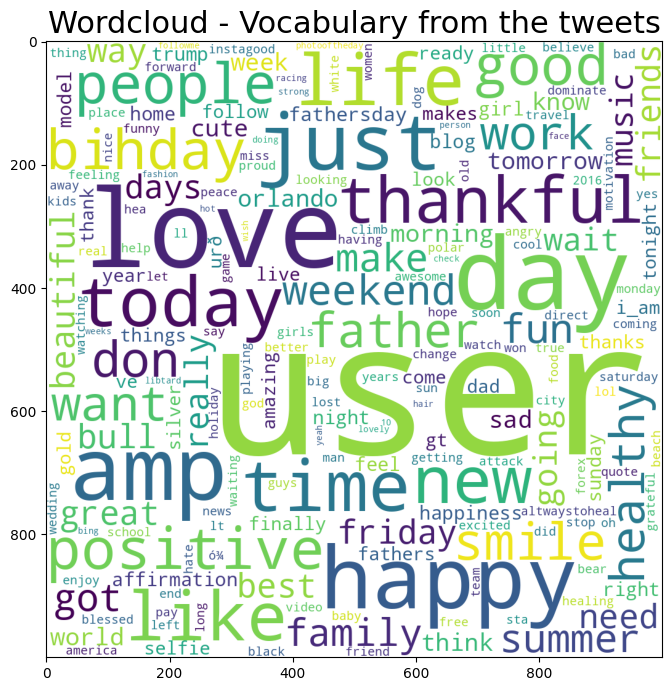

In [32]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=1000, height=1000).generate_from_frequencies(dict(word_freq))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.title("Wordcloud - Vocabulary from the tweets", fontsize=22)
plt.show()

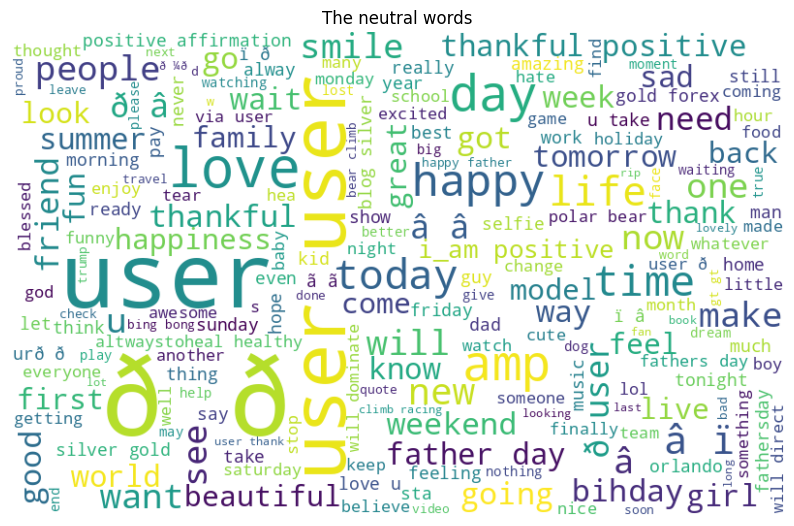

In [39]:
normal_words = ' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=0, max_font_size=110).generate(normal_words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The neutral words")
plt.axis('off')
plt.show()

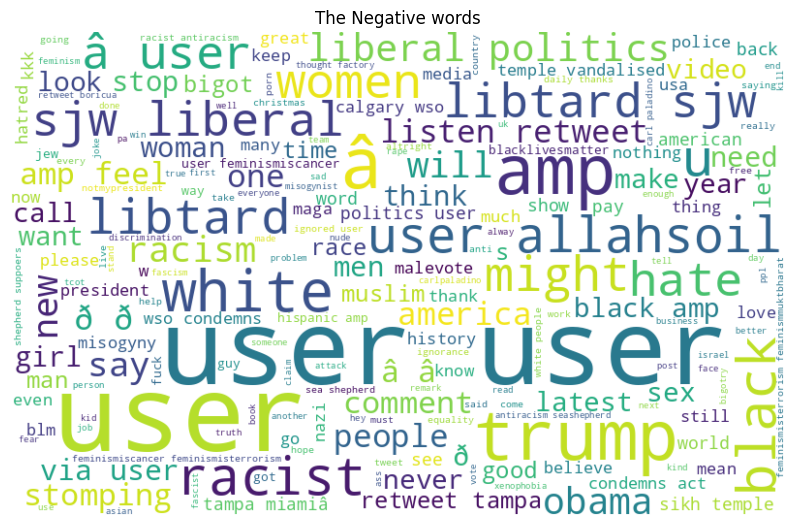

In [41]:
negative_words = ' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=0, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The Negative words")
plt.axis('off')
plt.show()

In [42]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    import re

    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)

    return hashtags

In [43]:
# extracting hashtag from non-hate tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtag from hate tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting the list
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

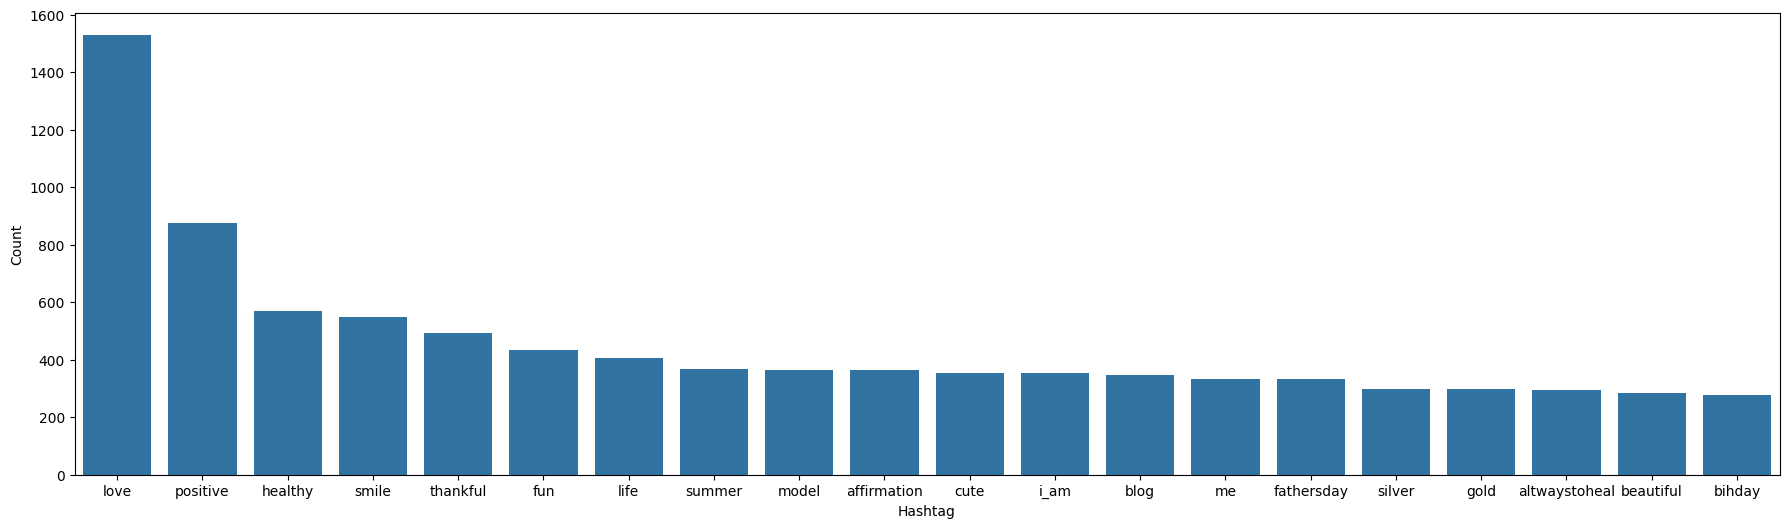

In [45]:
# positive tweets
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# top 20 hashtag
d = d.nlargest(columns='Count', n=20)
plt.figure(figsize=(22,6))
ax = sns.barplot(data=d, x="Hashtag", y='Count')
ax.set(ylabel = 'Count')
plt.show()

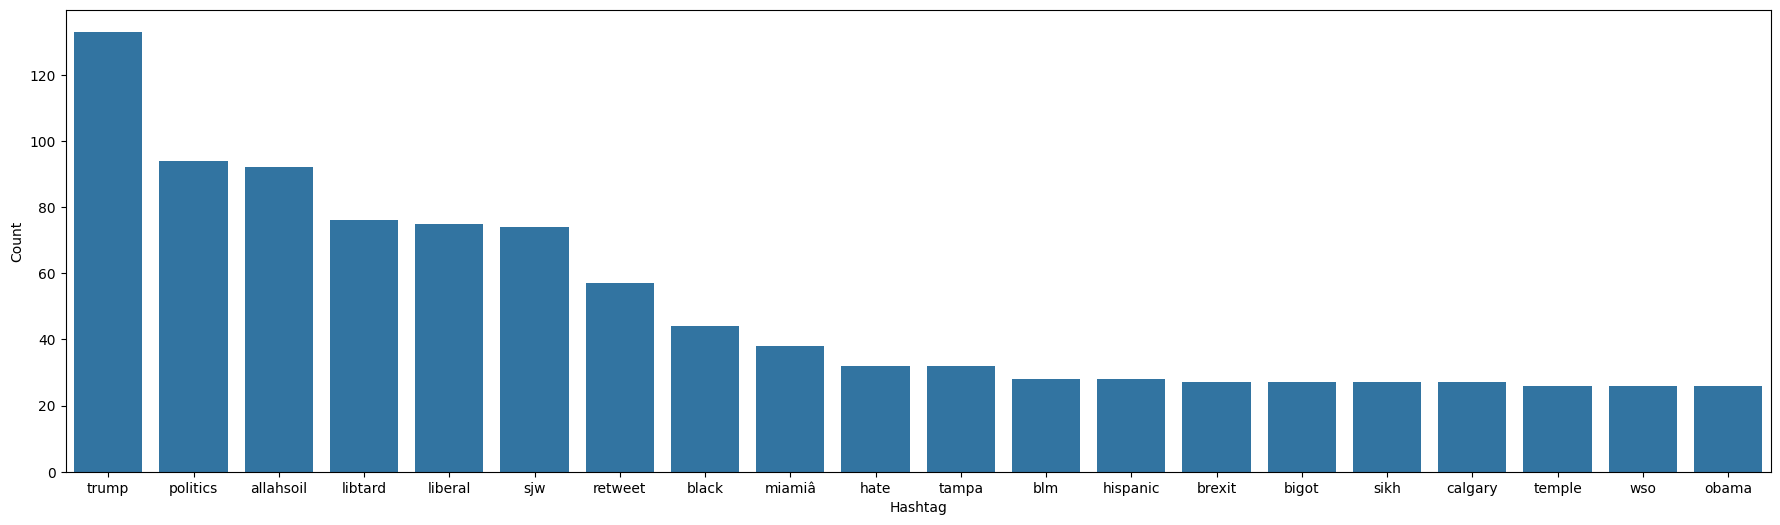

In [46]:
# negative tweets
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# top 20 hashtag
d = d.nlargest(columns='Count', n=20)
plt.figure(figsize=(22,6))
ax = sns.barplot(data=d, x="Hashtag", y='Count')
ax.set(ylabel = 'Count')
plt.show()

In [50]:
# tokenizing the words in the tweet
tokenized_tweet = train['tweet'].apply(lambda x: x.split())

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
                tokenized_tweet,
                vector_size = 200,     # desired number of features / independent variable
                window = 5,            # context window size
                min_count = 2,
                sg = 1,                # skipgram
                hs = 0,
                negative = 10,         # negative sample size
                seed = 42)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(6110735, 8411580)

In [61]:
model_w2v.wv.most_similar(positive='india')

[('rbi', 0.655592143535614),
 ('demonic', 0.635278582572937),
 ('mumbai', 0.5793843865394592),
 ('pakistan', 0.5754016637802124),
 ('makeover', 0.5644555687904358),
 ('semitic', 0.5618736147880554),
 ('comparable', 0.5562426447868347),
 ('palestinian', 0.5536431074142456),
 ('respected.', 0.5500448346138),
 ('goa', 0.5472162961959839)]

In [62]:
model_w2v.wv.most_similar(negative='india')

[('#blonde', 0.10286951810121536),
 ('please.', 0.09473363310098648),
 ('listen', 0.07254897803068161),
 ('#sleep', 0.059364546090364456),
 ('#instalike', 0.051173947751522064),
 ('#tattoos', 0.04734087362885475),
 ('#geek', 0.039529163390398026),
 ('#colors', 0.03932013362646103),
 ('#nerd', 0.039193734526634216),
 ('#share', 0.03889572620391846)]

In [65]:
model_w2v.wv.most_similar(positive='hate')

[('losers.', 0.536554753780365),
 ('gosh..', 0.5289031267166138),
 ('much?', 0.5132591724395752),
 ('champion,', 0.5046758055686951),
 ('intolerance.', 0.504026472568512),
 ('kill.', 0.5029367804527283),
 ('#arabs', 0.49959757924079895),
 ('wats', 0.49565035104751587),
 ('crime.', 0.49031487107276917),
 ('stalk', 0.48945921659469604)]